# **PRÁCTICA 4:  Deep Learning - Parte 2: RNN**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

## **Ejercicio 3: Modifica la capa LSTM para que use una función de activación diferente. ¿Qué pasa con el entrenamiento?**


# Laboratorio

Vamos a hacer predicción del valor de un activo financiero de una empresa a partir del valor de los días anteriores de varias compañías.

## Datos y librerías

In [ ]:
# Importamos librerías
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, LSTM, GRU
import numpy as np
import pandas as pd
from keras.callbacks import History 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Para leer datos lo mejor es usar la toolbox pandas

Los datos se han sacado de:
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3

In [ ]:
dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
dd_aa = pd.read_csv("aa.us.txt", delimiter=",")
dd_iae = pd.read_csv("iae.us.txt", delimiter=",")

In [ ]:
googl_op = dd_googl['Open'].values
aa_op = dd_aa['Open'].values
iae_op = dd_iae['Open'].values

In [ ]:
aa = dd_googl['Date'].values
googl_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
aa = dd_aa['Date'].values
aa_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    aa_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
aa = dd_iae['Date'].values
iae_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    iae_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [ ]:
print(googl_indice.shape)
print(googl_op.shape)

(3333,)
(3333,)


In [ ]:
indices = set(googl_indice) & set(aa_indice) & set(iae_indice) 

ii = np.in1d(googl_indice,list(indices))
data_googl = googl_op[ii]
ii = np.in1d(aa_indice,list(indices))
data_aa = aa_op[ii]
ii = np.in1d(iae_indice,list(indices))
data_iae = iae_op[ii]

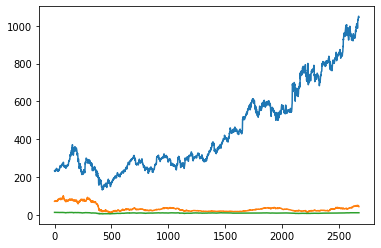

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(data_googl)
plt.plot(data_aa)
plt.plot(data_iae)

In [ ]:
DAT = np.zeros((data_googl.shape[0],3))
DAT[:,0] = data_googl
DAT[:,1] = data_aa
DAT[:,2] = data_iae          

In [ ]:
DAT.shape

(2678, 3)

In [ ]:
LAG = 5
DAT_TS = np.zeros((DAT.shape[0]-LAG,LAG,DAT.shape[1]))

for ii in range(0,DAT.shape[0]-LAG):
    DAT_TS[ii,:,:] = DAT[ii:ii+LAG,:]

In [ ]:
DAT_TS.shape

(2673, 5, 3)

In [ ]:
Ntr = np.floor(DAT_TS.shape[0]/2)
Y_target = 0

XX_tr = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
XX_ts = DAT_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),0:LAG-1,:]

YY_tr = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]
YY_ts = DAT_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),LAG-1,Y_target]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [ ]:
print("El tamaño del array XX_ts es", XX_tr.shape, ":",  
      XX_tr.shape[0], "veces (",
      XX_tr.shape[1], "filas y ", 
      XX_tr.shape[2], "columnas )")

El tamaño del array XX_ts es (1336, 4, 3) : 1336 veces ( 4 filas y  3 columnas )


In [ ]:
print("El tamaño del array XX_ts es", XX_ts.shape, ":",  
      XX_ts.shape[0], "veces (",
      XX_ts.shape[1], "filas y ", 
      XX_ts.shape[2], "columnas )")

El tamaño del array XX_ts es (1335, 4, 3) : 1335 veces ( 4 filas y  3 columnas )


## Modelos

### MODELO 1 - F.A. RELU CAPA OCULTA 

In [ ]:
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(XX_tr.shape[1],XX_tr.shape[2],), return_sequences = True))
model.add(LSTM(10,return_sequences = True))
model.add(Conv1D(10, 3))
model.add(GRU(10))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mae')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 4, 50)             10800     
                                                                 
 lstm_12 (LSTM)              (None, 4, 10)             2440      
                                                                 
 conv1d_5 (Conv1D)           (None, 2, 10)             310       
                                                                 
 gru_5 (GRU)                 (None, 10)                660       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 14,221
Trainable params: 14,221
Non-trainable params: 0
_________________________________________________________________


### MODELO 2 - F.A TANH CAPA OCULTA


In [ ]:
model2 = Sequential()
model2.add(LSTM(50, activation="tanh", input_shape=(XX_tr.shape[1],XX_tr.shape[2],), return_sequences = True))
model2.add(LSTM(10,return_sequences = True))
model2.add(Conv1D(10, 3))
model2.add(GRU(10))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mae')

In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 4, 50)             10800     
                                                                 
 lstm_14 (LSTM)              (None, 4, 10)             2440      
                                                                 
 conv1d_6 (Conv1D)           (None, 2, 10)             310       
                                                                 
 gru_6 (GRU)                 (None, 10)                660       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 14,221
Trainable params: 14,221
Non-trainable params: 0
_________________________________________________________________


### MODELO 3 - F.A SIGMOIDE CAPA OCULTA

In [ ]:
model3 = Sequential()
model3.add(LSTM(50, activation="sigmoid", input_shape=(XX_tr.shape[1],XX_tr.shape[2],), return_sequences = True))
model3.add(LSTM(10,return_sequences = True))
model3.add(Conv1D(10, 3))
model3.add(GRU(10))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mae')

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 4, 50)             10800     
                                                                 
 lstm_16 (LSTM)              (None, 4, 10)             2440      
                                                                 
 conv1d_7 (Conv1D)           (None, 2, 10)             310       
                                                                 
 gru_7 (GRU)                 (None, 10)                660       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 14,221
Trainable params: 14,221
Non-trainable params: 0
_________________________________________________________________


### MODELO 4 - F.A LINEAR CAPA OCULTA

In [ ]:
model4 = Sequential()
model4.add(LSTM(50, activation="linear", input_shape=(XX_tr.shape[1],XX_tr.shape[2],), return_sequences = True))
model4.add(LSTM(10,return_sequences = True))
model4.add(Conv1D(10, 3))
model4.add(GRU(10))
model4.add(Dense(1))
model4.compile(optimizer='adam',loss='mae')

In [ ]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 4, 50)             10800     
                                                                 
 lstm_18 (LSTM)              (None, 4, 10)             2440      
                                                                 
 conv1d_8 (Conv1D)           (None, 2, 10)             310       
                                                                 
 gru_8 (GRU)                 (None, 10)                660       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 14,221
Trainable params: 14,221
Non-trainable params: 0
_________________________________________________________________


### MODELO 5 - F.A LINEAR ÚLTIMA CAPA Y  LSTM F.A RELU

In [ ]:
model5 = Sequential()
model5.add(LSTM(50, activation="relu", input_shape=(XX_tr.shape[1],XX_tr.shape[2],), return_sequences = True))
model5.add(LSTM(10, activation="relu",return_sequences = True))
model5.add(Conv1D(10, 3))
model5.add(GRU(10))
model5.add(Dense(1, activation="linear"))
model5.compile(optimizer='adam',loss='mae')

In [ ]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 4, 50)             10800     
                                                                 
 lstm_20 (LSTM)              (None, 4, 10)             2440      
                                                                 
 conv1d_9 (Conv1D)           (None, 2, 10)             310       
                                                                 
 gru_9 (GRU)                 (None, 10)                660       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 14,221
Trainable params: 14,221
Non-trainable params: 0
_________________________________________________________________


## Evaluación entrenamiento

In [ ]:
history = History()
model.fit(XX_tr, YY_tr, batch_size=32, epochs=50, verbose=0, callbacks=[history])
history2 = History()
model2.fit(XX_tr, YY_tr, batch_size=32, epochs=50, verbose=0, callbacks=[history2])
history3 = History()
model3.fit(XX_tr, YY_tr, batch_size=32, epochs=50, verbose=0, callbacks=[history3])
history4 = History()
model4.fit(XX_tr, YY_tr, batch_size=32, epochs=50, verbose=0, callbacks=[history4])
history5 = History()
model5.fit(XX_tr, YY_tr, batch_size=32, epochs=50, verbose=0, callbacks=[history5])

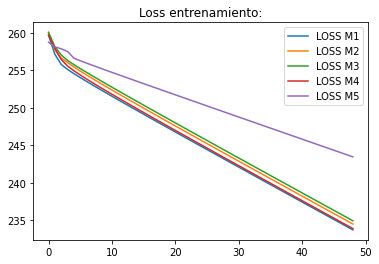

In [ ]:
loss_ev_m1 = history.history['loss']
loss_ev_m2 = history2.history['loss']
loss_ev_m3 = history3.history['loss']
loss_ev_m4 = history4.history['loss']
loss_ev_m5 = history5.history['loss']

%matplotlib inline
plt.figure()
plt.plot(loss_ev_m1[0:-1], label='LOSS M1')
plt.plot(loss_ev_m2[0:-1], label='LOSS M2')
plt.plot(loss_ev_m3[0:-1], label='LOSS M3')
plt.plot(loss_ev_m4[0:-1], label='LOSS M4')
plt.plot(loss_ev_m5[0:-1], label='LOSS M5')
plt.title("Loss entrenamiento:")
plt.legend()

In [ ]:
# Devuelve el valor de pérdida y los valores de métricas del modelo en modo de prueba.
score_m1 = model.evaluate(XX_tr, YY_tr, verbose=0)
score_m2 = model2.evaluate(XX_tr, YY_tr, verbose=0)
score_m3 = model3.evaluate(XX_tr, YY_tr, verbose=0)
score_m4 = model4.evaluate(XX_tr, YY_tr, verbose=0)
score_m5 = model5.evaluate(XX_tr, YY_tr, verbose=0)

print("Loss entrenamiento modelo 1: ", score_m1)
print("Loss entrenamiento modelo 2: ", score_m2)
print("Loss entrenamiento modelo 3: ", score_m3)
print("Loss entrenamiento modelo 4: ", score_m4)
print("Loss entrenamiento modelo 5: ", score_m5)

Loss entrenamiento modelo 1:  233.016357421875
Loss entrenamiento modelo 2:  233.8018341064453
Loss entrenamiento modelo 3:  234.23240661621094
Loss entrenamiento modelo 4:  233.188720703125
Loss entrenamiento modelo 5:  243.0100860595703


In [ ]:
y_hat_m1_entrenamiento = model.predict(XX_tr)
y_hat_m2_entrenamiento = model2.predict(XX_tr)
y_hat_m3_entrenamiento = model3.predict(XX_tr)
y_hat_m4_entrenamiento = model4.predict(XX_tr)
y_hat_m5_entrenamiento = model5.predict(XX_tr)

print("MAE test modelo 1: ", np.mean(abs(y_hat_m1_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 2: ", np.mean(abs(y_hat_m2_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 3: ", np.mean(abs(y_hat_m3_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 4: ", np.mean(abs(y_hat_m4_entrenamiento[:,0]-YY_tr)))

MAE test modelo 1:  233.01637592429887
MAE test modelo 2:  233.80186037246338
MAE test modelo 3:  234.2324226530726
MAE test modelo 4:  233.1887334949242


In [ ]:
print("Shape entrenamiento modelo 1:", y_hat_m1.shape)
print("Shape entrenamiento modelo 2:", y_hat_m2.shape)
print("Shape entrenamiento modelo 3:", y_hat_m3.shape)
print("Shape entrenamiento modelo 4:", y_hat_m4.shape)

Shape entrenamiento modelo 1: (1335, 1)
Shape entrenamiento modelo 2: (1335, 1)
Shape entrenamiento modelo 3: (1335, 1)
Shape entrenamiento modelo 4: (1335, 1)


## Evaluación test

In [ ]:
y_hat_m1_entrenamiento = model.predict(XX_tr)
y_hat_m1_test = model.predict(XX_ts)
y_hat_m2_entrenamiento = model2.predict(XX_tr)
y_hat_m2_test = model2.predict(XX_ts)

y_hat_m3_entrenamiento = model3.predict(XX_tr)
y_hat_m3_test = model3.predict(XX_ts)

y_hat_m4_entrenamiento = model4.predict(XX_tr)
y_hat_m4_test = model4.predict(XX_ts)

y_hat_m5_entrenamiento = model5.predict(XX_tr)
y_hat_m5_test = model5.predict(XX_ts)

print("MAE entrenamiento modelo 1: ", np.mean(abs(y_hat_m1_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 1: ", np.mean(abs(y_hat_m1_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 2: ", np.mean(abs(y_hat_m2_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 2: ", np.mean(abs(y_hat_m2_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 3: ", np.mean(abs(y_hat_m3_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 3: ", np.mean(abs(y_hat_m3_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 4: ", np.mean(abs(y_hat_m4_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 4: ", np.mean(abs(y_hat_m4_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 5: ", np.mean(abs(y_hat_m5_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 5: ", np.mean(abs(y_hat_m5_test[:,0]-YY_tr[:-1])))


MAE entrenamiento modelo 1:  233.01637592429887
MAE test modelo 1:  232.99214844555806
MAE entrenamiento modelo 2:  233.80186037246338
MAE test modelo 2:  233.77763058500258
MAE entrenamiento modelo 3:  234.2324226530726
MAE test modelo 3:  234.2081931536957
MAE entrenamiento modelo 4:  233.1887334949242
MAE test modelo 4:  233.1645039902591
MAE entrenamiento modelo 5:  243.01009310648112
MAE test modelo 5:  242.98586346464126


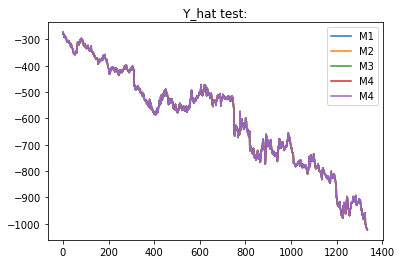

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(y_hat_m1_test[:,0]-YY_ts, label='M1')
plt.plot(y_hat_m2_test[:,0]-YY_ts, label='M2')
plt.plot(y_hat_m3_test[:,0]-YY_ts, label='M3')
plt.plot(y_hat_m4_test[:,0]-YY_ts, label='M4')
plt.plot(y_hat_m4_test[:,0]-YY_ts, label='M4')
plt.title("Y_hat test:")
plt.legend()

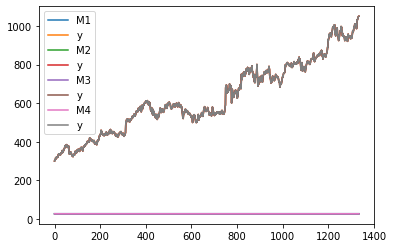

In [ ]:
plt.figure()
plt.plot(y_hat_m1_test[:,0], label='M1')
plt.plot(YY_ts, label='y')
plt.plot(y_hat_m2_test[:,0], label='M2')
plt.plot(YY_ts, label='y')
plt.plot(y_hat_m3_test[:,0], label='M3')
plt.plot(YY_ts, label='y')
plt.plot(y_hat_m4_test[:,0], label='M4')
plt.plot(YY_ts, label='y')
plt.legend()

## Conclusión a la pregunta planteada



In [ ]:
print("MAE entrenamiento modelo 1: ", np.mean(abs(y_hat_m1_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 1: ", np.mean(abs(y_hat_m1_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 2: ", np.mean(abs(y_hat_m2_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 2: ", np.mean(abs(y_hat_m2_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 3: ", np.mean(abs(y_hat_m3_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 3: ", np.mean(abs(y_hat_m3_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 4: ", np.mean(abs(y_hat_m4_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 4: ", np.mean(abs(y_hat_m4_test[:,0]-YY_tr[:-1])))

print("MAE entrenamiento modelo 4: ", np.mean(abs(y_hat_m4_entrenamiento[:,0]-YY_tr)))
print("MAE test modelo 4: ", np.mean(abs(y_hat_m5_test[:,0]-YY_tr[:-1])))

MAE entrenamiento modelo 1:  233.01637592429887
MAE test modelo 1:  232.99214844555806
MAE entrenamiento modelo 2:  233.80186037246338
MAE test modelo 2:  233.77763058500258
MAE entrenamiento modelo 3:  234.2324226530726
MAE test modelo 3:  234.2081931536957
MAE entrenamiento modelo 4:  233.1887334949242
MAE test modelo 4:  233.1645039902591
MAE entrenamiento modelo 4:  233.1887334949242
MAE test modelo 4:  242.98586346464126


En varios ejercicios se ha comentado la importancia del entender la forma y estructura de los datos. La función de activación influye en nuestro modelo dependiendo del formato de nuestras variables. 

Entender nuestros datos nos permite saber que la función de activación inluye en la forma y estructura de la salida del modelo. 

En la última capa:
- Si en la salida de la última capa necesitamos datos númericos como el valor activo, no nos interesa ni una sigmoide ni una tanh ya que sus intervalos no coinciden (0:1 ó -1:1 respectivamente). En este caso deberíamos poner una función *`lineal`*. 

- Si en la salida de la última capa estas clasificando clases entre 0:1 tu función de activación de la capa de salida tiene que ser una `*sigmoide*` que nos devuelve un valore ente 0:1.

- Si en la salida de la última capa necesitas valores entre -1:1, deberíamos utilizar una *`tanh`*.



> La influencia de la elección de la función de activación es muy importante a la hora de selecionar un buen modelo. En la capa de salida la f.a. es muy importante porque tine que estar en las mismas unidades que y que vayas al meter al modelo para poder comparar.


**En capas ocultas:**
- Si en una capa oculta tu pones la *`lineal`*. Toda la red converge a una suma, es decir a una suma de w*x+sum(pesos.)
- Si en una capa oculta tu pones una *`relu`*, que lo que hace es el máximo entre 0:número (si tenemos un 5 se queda un 5 pero si tenemos un -1 se queda en 0). Sirve para que no pase lo del devanecimiento del gradiente, por ejemplo.

> Las de las capas ocultas también son muy importantes dependiendo del modelo pero no hay algo general si no que es más parecido a una norma.

*Vamos a poner un ejermplo: Si lo que tenemos es una red con más de 3 capas ocultas o una red muy profunda como una LSTM o una convolucional no podemos poner ni de broma sigmoid de función de activación. Esto se debe a que si hacemos esto, el gradiente nos converge a cero y nuestra red/modelo no va a aprender.* 

*Como "norma" en estos casos donde la red es muy profunda (LSTM, etc.) o una convolucional tenemos que poner relu, selu, etc. pero no una tanh ni sigmoid*

**Resumen:**
> Nos podemos dar cuenta, que tanto en las capas ocultas como en la última capa, la función de activación juega un gran papel ya que si no la elegimos bien, el modelo empeora.